# Granules

In [1]:
import starepandas
import geopandas
import pystare
import matplotlib.pyplot as plt
import importlib

In [2]:
fname = '../tests/data/granules/MOD05_L2.A2019336.0000.061.2019336211522.hdf'
modis = starepandas.read_granule(fname, latlon=True, sidecar=True)

In [3]:
modis

,lat,lon,sids,Scan_Start_Time,Solar_Zenith,Solar_Azimuth,Sensor_Zenith,Sensor_Azimuth,Water_Vapor_Infrared
0,53.201778,-15.933996,4298473764500464809,8.493984e+08,147.089997,-22.959999,65.339999,-89.519998,NaN
1,53.203171,-16.288101,4298458168380511209,8.493984e+08,146.999997,-23.539999,64.719999,-89.799998,NaN
2,53.203518,-16.629105,4297394569014717897,8.493984e+08,146.919997,-24.099999,64.109999,-90.079998,NaN
3,53.202934,-16.957928,4297300698872999369,8.493984e+08,146.839997,-24.639999,63.509999,-90.339998,NaN
4,53.201508,-17.275316,4297290857922121161,8.493984e+08,146.759997,-25.159999,62.909999,-90.589998,NaN
...,...,...,...,...,...,...,...,...,...
109615,64.084297,-66.281410,3727686638370615689,8.493987e+08,121.569997,-74.679998,62.229999,47.999999,NaN
109616,63.960953,-66.591354,3727661374545790857,8.493987e+08,121.469997,-75.049998,62.819999,47.719999,NaN
109617,63.831799,-66.911255,3727838256925064969,8.493987e+08,121.369997,-75.439998,63.419999,47.429999,NaN
109618,63.698635,-67.236229,3727843063731949801,8.493987e+08,121.259997,-75.829998,64.019999,47.139999,NaN


In [4]:
trixels = modis.make_trixels()
modis.set_trixels(trixels, inplace=True)

In [5]:
geom = geopandas.points_from_xy(modis.lon, modis.lat)
modis.set_geometry(geom, inplace=True)

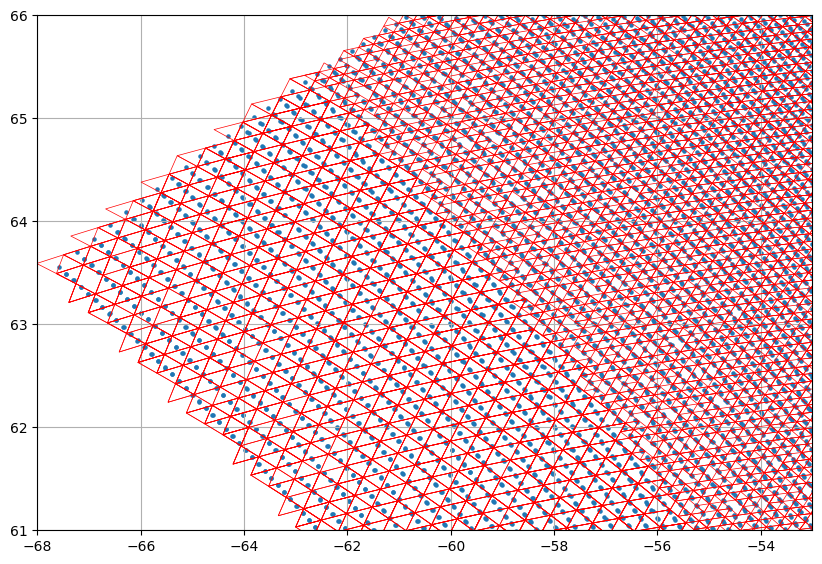

In [20]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
ax.grid(True)

ax.set_xlim(-68, -53)
ax.set_ylim(61, 66)
modis.plot(trixels=False, ax=ax, marker='.', markersize=20)
modis.plot(trixels=True, color='r', ax=ax, lw=0.5)

plt.savefig('modis.png')

## Plotting footprints

In [8]:
fname = '../tests/data/granules/MOD05_L2.A2019336.0000.061.2019336211522.hdf'
mod05 = starepandas.io.granules.Mod05(fname)

In [9]:
mod05.read_sidecar_cover()
mod05.stare_cover

masked_array(data=[3614138700964823044, 3616390500778508292,
                   3618642300592193540, ..., 4298608878511194121,
                   4298613276557705225, 4298668252139094025],
             mask=False,
       fill_value=999999)

## Manually getting the 2D STARE array

In [10]:
import netCDF4
from pyhdf.SD import SD
import numpy
import pystare
import datetime

In [11]:
hdf = SD(fname)
lon = hdf.select('Longitude').get().astype(numpy.double)
lat = hdf.select('Latitude').get().astype(numpy.double)

In [12]:
start = datetime.datetime.now()
sids = pystare.from_latlon_2d(lat=lat, lon=lon, adapt_level=True)
datetime.datetime.now()-start

datetime.timedelta(seconds=1, microseconds=99489)

In [13]:
print(pystare.spatial_resolution(sids).min())
print(pystare.spatial_resolution(sids).max())

9
11


## Intersecting Data 

In [14]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.sort_values(by='name', inplace=True)
world = starepandas.STAREDataFrame(world)
sids = world.make_sids(resolution=7)
world.set_sids(sids, inplace=True)
trixels = world.make_trixels()
world.set_trixels(trixels, inplace=True)

<AxesSubplot:>

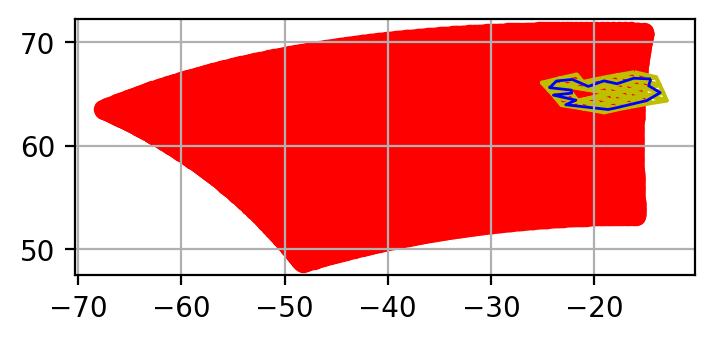

In [15]:
fig, ax = plt.subplots(figsize=(4,4), dpi=200)
ax.grid(True)

country = world[world.name=='Iceland']
country.plot(ax=ax, trixels=True, boundary=True, color='y', zorder=1)
country.plot(ax=ax, trixels=False, facecolor="none", edgecolor='blue', zorder=1)
modis.plot(ax=ax, color='red', trixels=False, zorder=0)

In [26]:
a = modis.stare_intersects(country['sids'].iloc[0])
a.any()

True

In [28]:
len(country['sids'].iloc[0])

44